# 1. S&P 500 Analysis

In [10]:
# We import the necessary packages 
import pandas as pd 
import pandas_datareader
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


,SP500
count,124.000000
mean,3077.008145
std,247.335775
min,2237.400000
25%,2995.912500
50%,3118.805000
75%,3244.292500
max,3386.150000


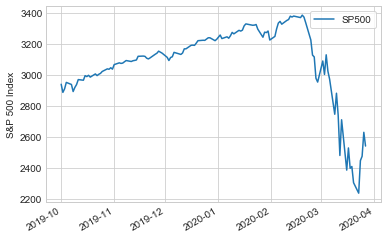

In [11]:
# In this section we import data on the S&P 500, from the Federal Reserve Economic Data, through an API. We also specify the periode for which we want data
start = dt.datetime(2019,10,1)
end = dt.datetime(2020,3,27)
wolfie = pandas_datareader.data.DataReader('SP500', 'fred', start, end)

# We drop observations which are Not A Number
wolfie = wolfie.dropna()

# We make a plot of our data to visualize it and we call the describe method to generate descriptive statistics 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

wolfie.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('S&P 500 Index')

wolfie.describe()

The graph shows a steady growth in the S&P 500 index up until a sharp decline in around march 2020, which is caused by the Covid-19 lockdown. However, the economy seems to already be recovering in april. 

SP500     4846.617378
%yield       0.390958
dtype: float64
SP500     85593.914060
%yield        9.269845
dtype: float64


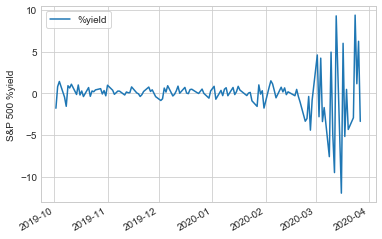

In [12]:
# Here we calculate the percentage change in the S&P 500 index, per period, and plot these changes
wolfie['%yield'] = wolfie.SP500.pct_change().mul(100).round(2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

wolfie['%yield'].plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('S&P 500 %yield')

# Because our graph shows great volatility in the end of the series, we look at the variance for the first and last part of our dataset 
print(np.var(wolfie[1:40]))
print(np.var(wolfie[40:]))

We can conclude that the development of the index increaes in volatility, with the outbreak of Covid-19 in USA. 

Now, to remove some of the of seasonal volatility we calculate a 8-day moving average on the S&P500 index. A period of 8 days is somewhat short for a moving average, but we have chosen to do so because our period is also rather short.

In [13]:
# Here we make a 8 day-moving-average on the S&P 500 and append to our dataframe 
wolfie['8ma'] = wolfie['SP500'].rolling(window=8, min_periods = 0).mean()

print(wolfie.head())

              SP500  %yield       8ma
DATE                                 
2019-10-01  2940.25     NaN  2940.250
2019-10-02  2887.61   -1.79  2913.930
2019-10-03  2910.63    0.80  2912.830
2019-10-04  2952.01    1.42  2922.625
2019-10-07  2938.79   -0.45  2925.858


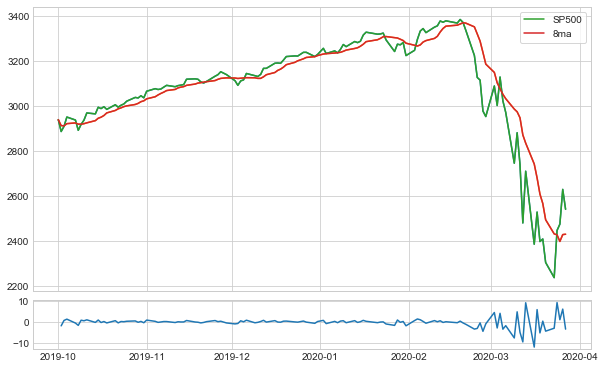

In [38]:
# We plot our moving average and the actual S&P 500 index on axis 1, which is the main plot, and the %yield on axis 2, which is a subplot
plt.figure(figsize=(10,7))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(wolfie.index, wolfie['SP500'])
ax1.plot(wolfie.index, wolfie['8ma'])
ax2.plot(wolfie.index, wolfie['%yield'])

wolfie['SP500'].plot(ax=ax1)
wolfie['8ma'].plot(ax=ax1)
ax1.legend(frameon=True)

We can see from the graph, that our moving average follows the actual series closely until, as seen before, the crisis caused by Covid-19, where the moving average begins to overshoot. 

# 2. Reading and writing data from Denmarks statistics

We will look at the danish stock index and compare it to the danish private consumption in the years 1996 to 2019.


In [64]:
# First we have a look at he excel file with stock index data:
stocks = pd.read_excel (Stocks.xlsx',skiprows=2)

# We rename the column called Unnamed: 0. 
# This is done using df.rename(columns=dict), where dict must be a Python dictionary.
# We give it the name 'Year':
stocks.rename(columns = {'Unnamed: 0':'Year'},inplace=True)
stocks = stocks.dropna()

# We see that the the different years in the year column has been named 1996.0 instead of 1996.
# We correct this by making a dictionary with the right years, done with a loop.
myDict_stocks = {}
for i in range(1996,2020):
    myDict_stocks[str(i)] = f'e{i}'

# The column is replaced:
stocks['Year'] = myDict_stocks

# The other column is also replaced by a better suited name.
stocks.rename(columns = {'Aktier i alt (OMXC ultimo december 1995 = 100)':'Stock Index 1995=100'},inplace=True)

# Now we have the following table for stock index data in Denmark in the years 1996 to 2019.
stocks.head(24)

,Year,Stock Index 1995=100
0,1996,130.0
1,1997,184.0
2,1998,175.0
3,1999,214.0
4,2000,248.0
5,2001,212.0
6,2002,167.0
7,2003,217.0
8,2004,263.0
9,2005,368.0


In [65]:
# Now we have a look at the excel file with the private consumption data:
consumption = pd.read_excel (Consumption.xlsx',skiprows=32)

# We correct the years as before:
myDict_con = {}
for i in range(1996,2021+1):
    myDict_con[str(i)] = f'e{i}'

# The column is replaced:
consumption['1995'] = myDict_con

# The names of the two columns are replaced:
consumption.rename(columns = {'1995':'Year'},inplace=True)
consumption.rename(columns = {695.3:'Private Consumption (2010-prices)'},inplace=True)

# The column Unnamed: 0 is not needed and contain only missing values. So we will drop it.
drop_these = ['Unnamed: 0']
consumption.drop(drop_these,axis=1,inplace=True)
consumption = consumption.dropna()

# Now we have the following table for private consumption data (2010-prices) in Denmark in the years 1996 to 2019.
consumption.head(26)

,Year,Private Consumption (2010-prices)
0,1996,712.4
1,1997,733.3
2,1998,750.6
3,1999,749.7
4,2000,752.6
5,2001,754.3
6,2002,765.2
7,2003,775.4
8,2004,811.5
9,2005,841.5


It would be more convenient to have only one table, so we will like to combine the two tables. This is done by merging the two datasets.


In [66]:
# We do it with an outer join, that keep observations which are in either or in both datasets.
outer = pd.merge(stocks.head(24),consumption.head(24), on=['Year'],how='outer')

# We now have the following combined table:
outer.head(24)

,Year,Stock Index 1995=100,Private Consumption (2010-prices)
0,1996,130.0,712.4
1,1997,184.0,733.3
2,1998,175.0,750.6
3,1999,214.0,749.7
4,2000,248.0,752.6
5,2001,212.0,754.3
6,2002,167.0,765.2
7,2003,217.0,775.4
8,2004,263.0,811.5
9,2005,368.0,841.5


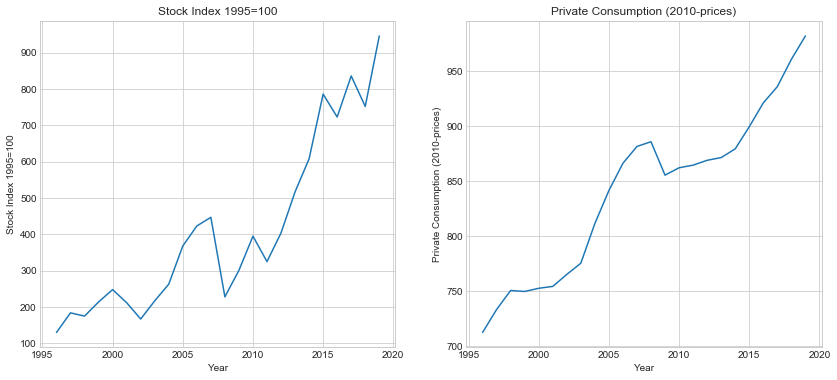

In [67]:
# Now we will present the data visually by making two plots: one of the stock index and one of the private consumption.
# We create our figure and specify the dimensions.
fig = plt.figure(figsize=(14,6))

# We generate our first figure (left) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,1)

# Here we plot the values for years on the x-axis and the values for stock Index 1995=100 on the y-axis
Years = np.linspace(1996,2019,24)
ax_left.plot(Years, outer['Stock Index 1995=100'])

# We label the axes:
ax_left.set_title('Stock Index 1995=100')
ax_left.set_xlabel('Year')
ax_left.set_ylabel('Stock Index 1995=100')
ax_left.grid(True)

# We generate our second figure (right) with 1 row and 2 columns
ax_right = fig.add_subplot(1,2,2)

# Here we plot the values for years on the x-axis and the values for private Consumption (2010-prices) on the y-axis
ax_right.plot(Years, outer['Private Consumption (2010-prices)'])

# We label the axes:
ax_right.set_title('Private Consumption (2010-prices)')
ax_right.set_xlabel('Year')
ax_right.set_ylabel('Private Consumption (2010-prices)')
ax_right.grid(True)

# We now have the following two figures of the stock index and the private consumption in Denmark 1996-2019:


An eyeball-analysis tells us, that private consumption and the stock index seem to correlate, but private consumption lags behind the stock index by a year or two 